In [1]:
import argparse
import copy
import math
import os
import random
import numpy as np
import shutil

from collections import namedtuple
from PIL import Image, ImageDraw 
from PIL import ImagePath 

from matplotlib import pyplot as plt
import pandas as pd
import cv2

import math

In [2]:


parser = argparse.ArgumentParser('Generate Polygons')
parser.add_argument('-n', '--number',
                    type=int,
                    default=5,
                    help='The number of polygons to generate.')
parser.add_argument('-i', '--image_size',
                    type=int,
                    default=160,
                    help='The size of the images in pixels.')

FLAGS, unparsed = parser.parse_known_args()

number = FLAGS.number
image_size = FLAGS.image_size
line_width = 3

Color = namedtuple("Color", "name value")
grays = [
    Color('black', (0, 0, 0)),
    Color('gray1', (32, 32, 32)),
    Color('gray2', (64, 64, 64)),
    Color('gray3', (96, 96, 96)),
    Color('gray4', (128, 128, 128)),
    Color('gray5', (160, 160, 160)),
    Color('gray6', (192, 192, 192)),
    Color('white', (255, 255, 255)),
    ]

black = grays[0].value
white = grays[-1].value
rColor = (255, 128, 128)

bkg_color = white
line_color = black
bound_color = grays[5].value

In [3]:
def get_random_numbers(min_tx, max_tx, number_tx):
    times = []
    while len(times) < number_tx:
        new_time = random.randint(min_tx, max_tx)
        if all(abs(new_time - time) >= 30 for time in times):
            times.append(new_time)
    return times



In [4]:

def generate_coord(image, bound_fill, n):
    '''
    Parameters
    ----------
    image : (*.png image) image file
    bound_fill : (tuple) RGB color of segmented region.
    n : (int, optional) number of pairs of inner and outer coordinates to generate.
    '''
    img_arr  = np.array(image)
    height, width, ch = np.array(img_arr).shape
    # n=3
    # angles = [i * 2*math.pi/n for i in range(n)]
    a  = get_random_numbers(0,72,1) #choose a point between 0-120
    b = a[0]+45 #131
    point_2 = get_random_numbers(b,144,1)
    c = point_2[0]+45 #203
    point_3 = get_random_numbers(c,216,1)
    d = point_3[0]+45 #263
    point_4 = get_random_numbers(d,288,1)
    e = point_4[0]+45 #323
    point_5 = get_random_numbers(e,340,1)
    a.append(point_2[0])
    a.append(point_3[0])
    a.append(point_4[0])
    a.append(point_5[0])
    angles = [math.radians(a[i]) for i in range(len(a))]


    points = []
    for angle in angles:
        x, y = height//2, width//2
        stepx, stepy = math.cos(angle), math.sin(angle)
        coords = []
        
        while True:
            x = x + stepx
            y = y + stepy
            
            xx, yy = int(x), int(y)
            if (xx < 0) or (xx >= height)  or (yy < 0) or (yy >= width):
                try:
                    points.append([coords[0], coords[-1]])     # inner and outer coordinates.
                    break
                except:
                    points.append([None, None])
            else:
                if(img_arr[yy, xx, 0:3] == bound_fill).all():
                   coords.append([xx, yy])
        
    inner_coord = [[p[0] for p in [x[0] for x in points]], [p[1] for p in [x[0] for x in points]]]
    outer_coord = [[p[0] for p in [x[1] for x in points]], [p[1] for p in [x[1] for x in points]]]
    return [inner_coord, outer_coord]


In [5]:

def generate_imgs(img_prefix='img', folder_name='ellipses'):
    '''
    Parameters
    ----------
    img_prefix : (string, optional) prefix to add to name of generated image file
    folder : (string, optional) directory to save generated image.
    '''

    coord_data = []
    paths = []
    for i in range(0,25):
        image = Image.new('RGB', (image_size, image_size), color=bkg_color)
        draw = ImageDraw.Draw(image, mode='RGB')
        
        x, y = image_size, image_size
        t = 40      # minimum thickness
        
        # Draw outer ellipse
        min_width = 100
        eX = random.choice(range(min_width, image_size-t//2+1, 1))
        eY = random.choice(range(min_width, image_size-t//2+1, 1))
        bbox =  (x/2 - eX/2, y/2 - eY/2, x/2 + eX/2, y/2 + eY/2)
        draw.ellipse(bbox, fill=bound_color)
        
        # Draw inner ellipse
        min_width = 20
        eX = random.choice(range(min_width, eX-t+1, 1))
        eY = random.choice(range(min_width, eY-t+1, 1))
        bbox =  (x/2 - eX/2, y/2 - eY/2, x/2 + eX/2, y/2 + eY/2)
        draw.ellipse(bbox, fill=bkg_color)
        
        coords = generate_coord(image, bound_fill=bound_color, n=12)
        plot_image(image, coords)
        # Save ellipse.
        save_path = base_path
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        path = save_path + img_prefix + '_' + str(i) +".png"
        image.save(path, "PNG")
        paths.append(path)
        coord_data.append(coords)
        print(i)

      
    return coord_data,paths
        


In [6]:
#create a new folder
import os
os.mkdir('images_wp/')


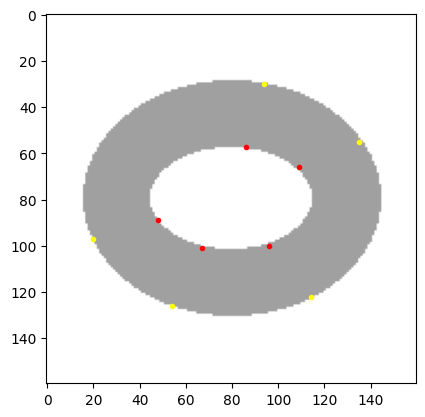

0


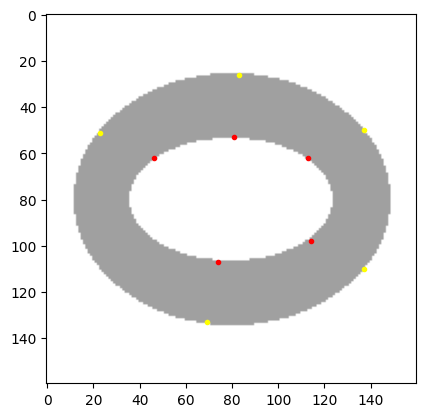

1


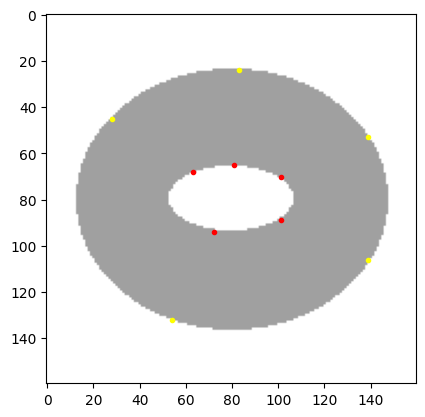

2


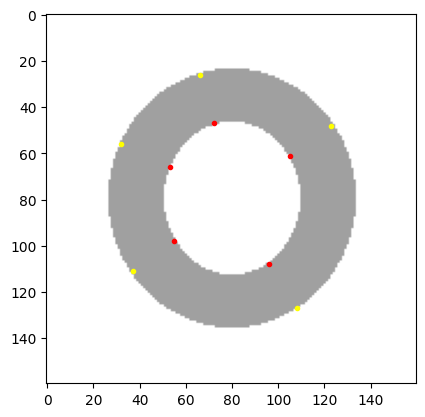

3


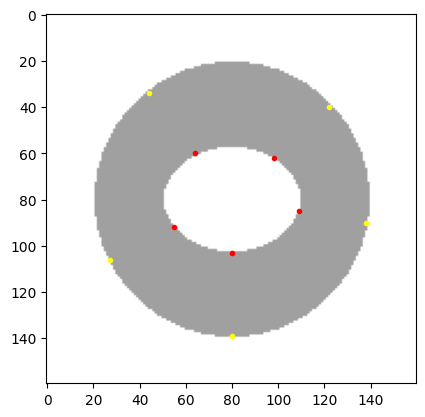

4


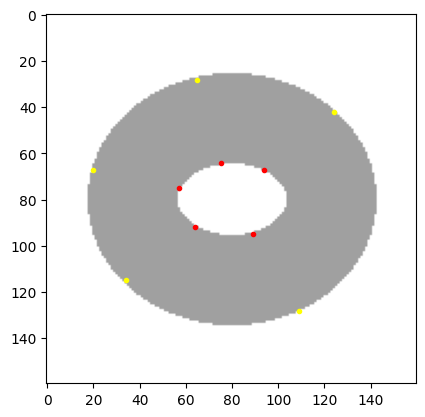

5


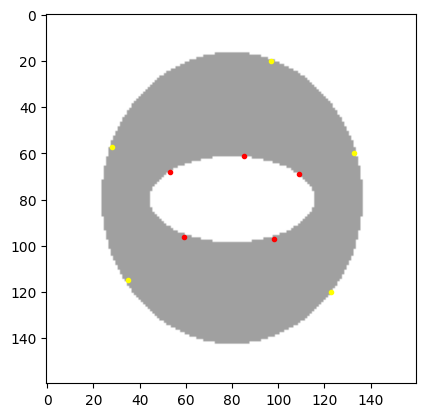

6


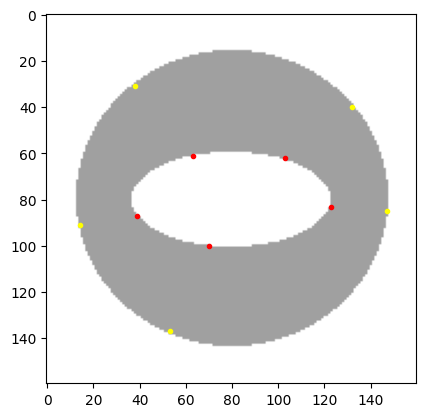

7


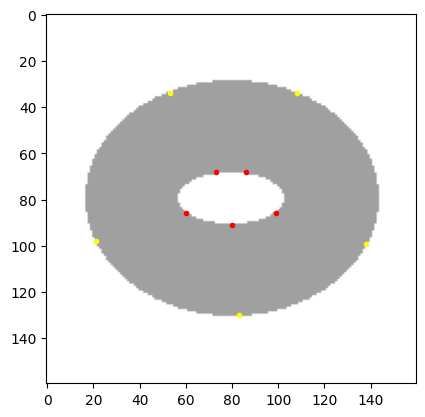

8


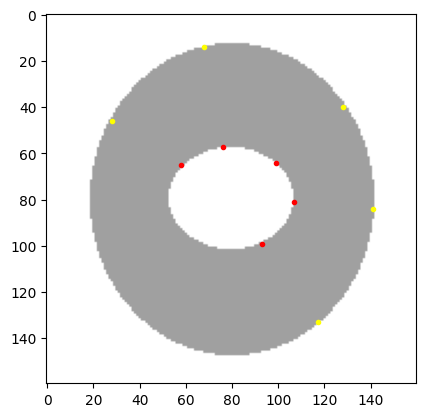

9


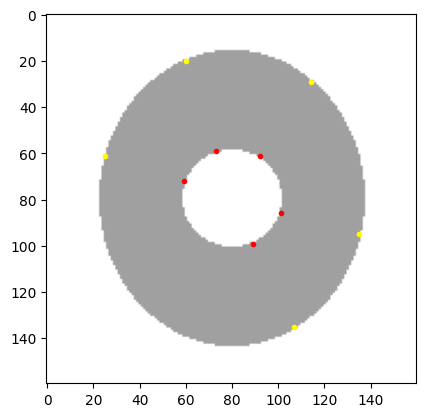

10


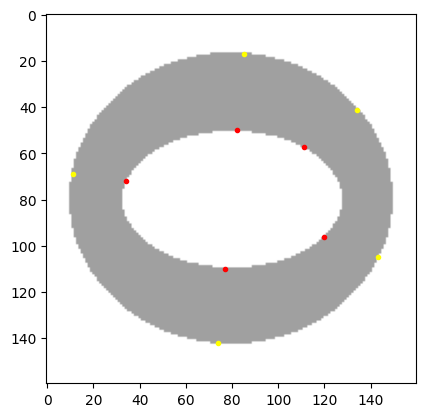

11


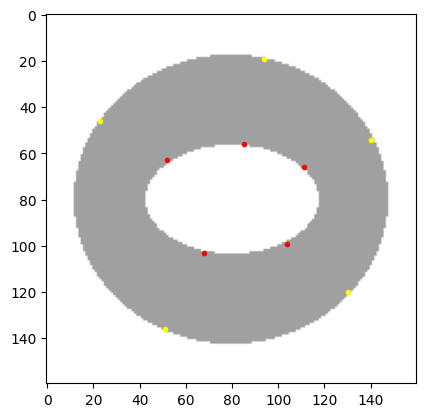

12


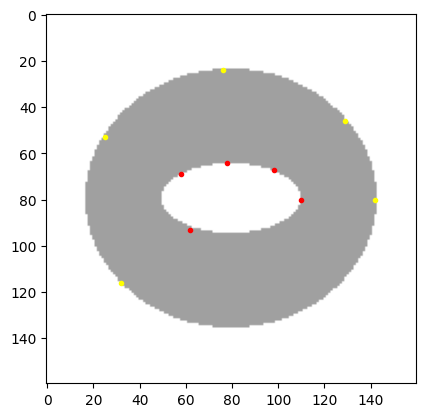

13


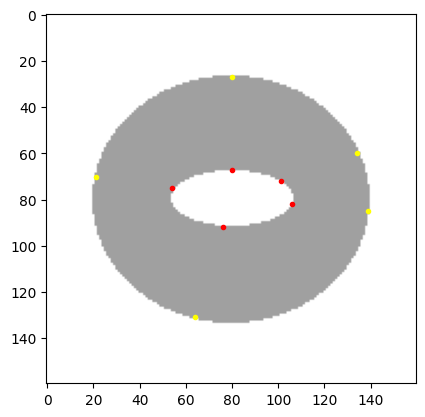

14


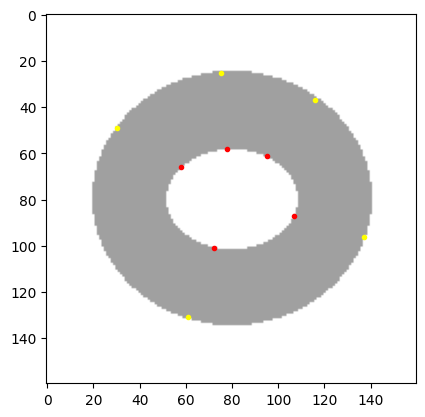

15


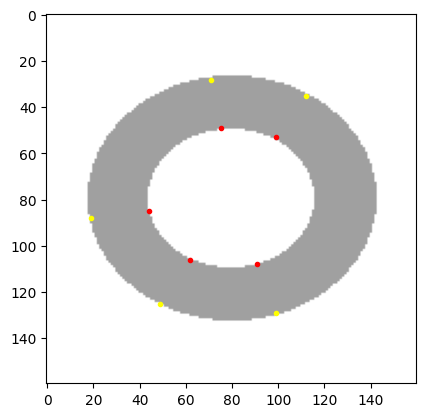

16


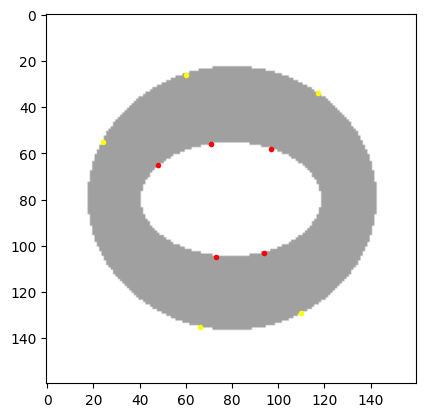

17


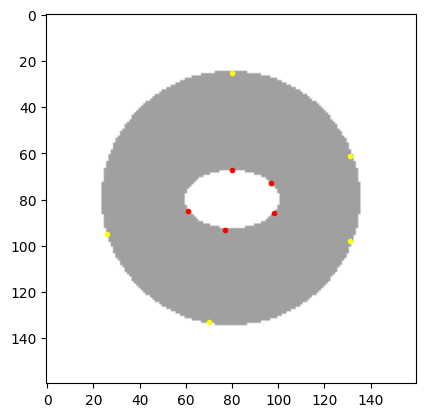

18


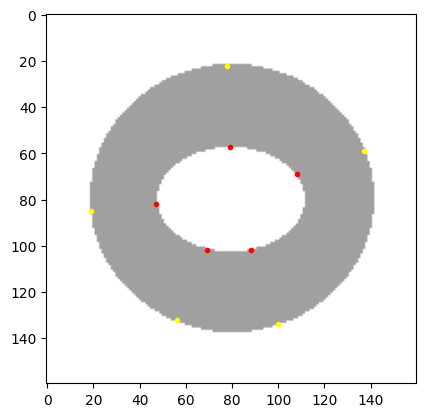

19


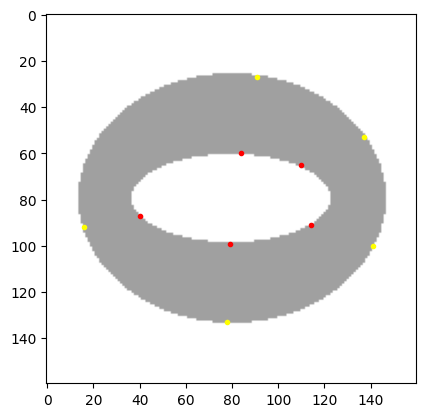

20


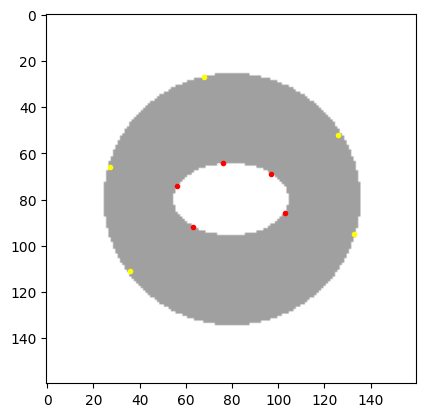

21


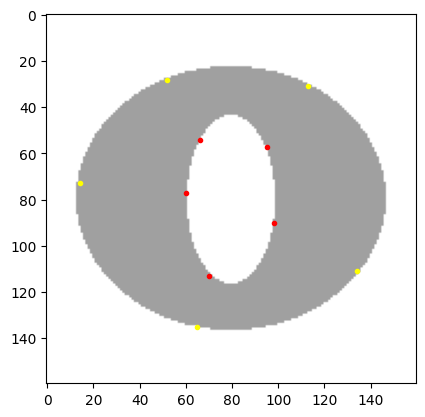

22


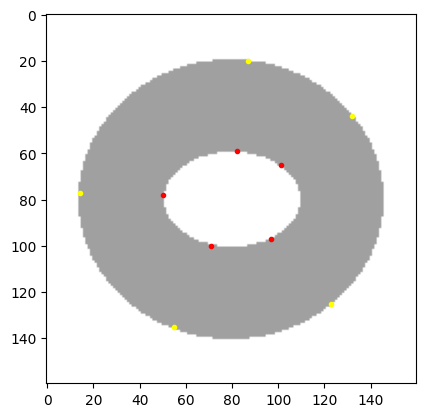

23


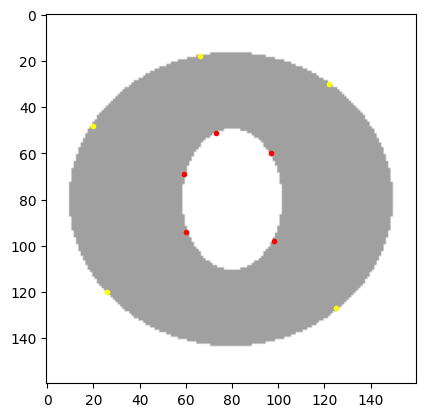

24


In [7]:

def plot_image(image, coords):
    '''
    Parameters
    ----------
    image : (*.png image) image file
    coor : (tuple) RGB color of segmented region.
    coords: pairs of inner and outer coordinates to plot on imput image.
    '''
    plt.plot(coords[0][0], coords[0][1], linestyle="", marker='.', color='red')
    plt.plot(coords[1][0], coords[1][1], linestyle="", marker='.', color='yellow')    # plot outer coordinates
    plt.imshow(image)
    plt.show()
        
# Generate data.
if __name__ == "__main__":
    base_path = "images/"
    if os.path.exists(base_path) and os.path.isdir(base_path):
        shutil.rmtree(base_path)
    data = generate_imgs(img_prefix='img', folder_name='ellipses')
    


In [8]:
# #plotting the inner points
def plot_points(a,b,image_path):
  img = cv2.imread(image_path)
  plt.imshow(img)
  img = cv2.imread(image_path)
  for x,y in zip(a,b):
    img[x,y] = (255,0,0)
    img[x-1,y-1] = (255,0,0)
    img[x,y-1] = (255,0,0)
    img[x+1,y-1] = (255,0,0)
    img[x-1,y] = (255,0,0)
    img[x+1,y] = (255,0,0)
    img[x-1,y+1] = (255,0,0)
    img[x,y+1] = (255,0,0)
    img[x+1,y+1] = (255,0,0)
  path = 'images_wp/'+image_path.split('images/')[1]
  cv2.imwrite(path,img)


In [9]:
img_paths = data[1]
num = 5

def inner_outer_fram(row):

  coordinate_data = data[0]
  inner_coordinates = []
  outer_coordinates = []
  for i in range(num):
    inner_coordinates.append((coordinate_data[row][0][0][i],coordinate_data[row][0][1][i]))

  for i in range(num):
    outer_coordinates.append((coordinate_data[row][1][0][i],coordinate_data[row][1][1][i]))

  list_coordinates = []
  for i in range(num):
    list_coordinates.append(inner_coordinates[i][0])
    list_coordinates.append(inner_coordinates[i][1])
    list_coordinates.append(outer_coordinates[i][0])
    list_coordinates.append(outer_coordinates[i][1])

  return list_coordinates



list_cood = []
for i in range(len(img_paths)):
  list_cood.append(inner_outer_fram(i))

columns =[]
for i in range(num):
  columns.append('x1_'+str(i+1))
  columns.append('y1_'+str(i+1))
  columns.append('x2_'+str(i+1))
  columns.append('y2_'+str(i+1))
coord_df = pd.DataFrame(list_cood,columns=columns)
img_df = pd.DataFrame(img_paths)
coord_img_df = coord_df
img_df
s = img_paths[0].split('images/')[1]
s
img_names = []
image_paths= []
for i in range(len(img_paths)):
  img_names.append(img_paths[i].split('images/')[1])
  image_paths.append('images/'+img_paths[i].split('images/')[1])
img_names
image_paths

coord_df['img_names'] = img_names
coord_df['img_paths'] = image_paths
coord_df.head(10)
#columns


,x1_1,y1_1,x2_1,y2_1,x1_2,y1_2,x2_2,y2_2,x1_3,y1_3,...,x1_4,y1_4,x2_4,y2_4,x1_5,y1_5,x2_5,y2_5,img_names,img_paths
0,96,100,114,122,67,101,54,126,48,89,...,86,57,94,30,109,66,135,55,img_0.png,images/img_0.png
1,114,98,137,110,74,107,69,133,46,62,...,81,53,83,26,113,62,137,50,img_1.png,images/img_1.png
2,101,89,139,106,72,94,54,132,63,68,...,81,65,83,24,101,70,139,53,img_2.png,images/img_2.png
3,96,108,108,127,55,98,37,111,53,66,...,72,47,66,26,105,61,123,48,img_3.png,images/img_3.png
4,109,85,138,90,80,103,80,139,55,92,...,64,60,44,34,98,62,122,40,img_4.png,images/img_4.png
5,89,95,109,128,64,92,34,115,57,75,...,75,64,65,28,94,67,124,42,img_5.png,images/img_5.png
6,98,97,123,120,59,96,35,115,53,68,...,85,61,97,20,109,69,133,60,img_6.png,images/img_6.png
7,123,83,147,85,70,100,53,137,39,87,...,63,61,38,31,103,62,132,40,img_7.png,images/img_7.png
8,99,86,138,99,80,91,83,130,60,86,...,73,68,53,34,86,68,108,34,img_8.png,images/img_8.png
9,107,81,141,84,93,99,117,133,58,65,...,76,57,68,14,99,64,128,40,img_9.png,images/img_9.png


In [10]:
inner_cols = []
for i in range(1,num+1):
  inner_cols.append('x1_'+str(i))
  inner_cols.append('y1_'+str(i))
inner_df = coord_df[inner_cols]

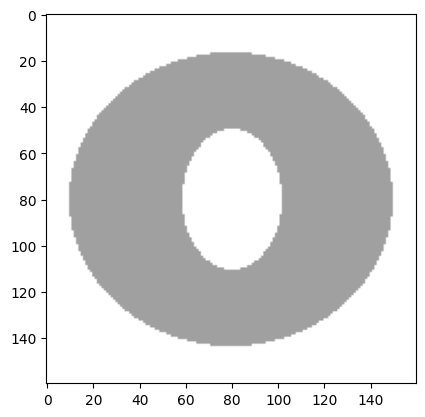

In [11]:
# #plotting the inner points
import cv2

x=[]
y=[]

for i in range(inner_df.shape[0]):
  for j in range(len(inner_cols)):
    if j%2 ==0:
      x.append(inner_df[inner_cols[j]][i])
    else:
      y.append(inner_df[inner_cols[j]][i])
  # print(coord_img_df['img_paths'][i])
  plot_points(y,x,coord_df['img_paths'][i])
  x.clear()
  y.clear()
  
  # plot_points(x,y,coord_df['img_paths'][i])
  # x=[]
  # y=[]
  


# plt.plot(x, y, linestyle="", marker='.', color='red')
# img = cv2.imread('images/img_1.png')
# plt.imshow(img)

In [12]:
!zip -r elliptic_rings_imgs_png_.zip /content/images
!zip -r elliptic_rings_imgs_png_wp.zip /content/images_wp
coord_df.to_csv('image_coordinates_180.csv')

  adding: content/images/ (stored 0%)
  adding: content/images/img_17.png (deflated 5%)
  adding: content/images/img_23.png (deflated 4%)
  adding: content/images/img_24.png (deflated 4%)
  adding: content/images/img_15.png (deflated 7%)
  adding: content/images/img_5.png (deflated 7%)
  adding: content/images/img_8.png (deflated 8%)
  adding: content/images/img_3.png (deflated 8%)
  adding: content/images/img_10.png (deflated 3%)
  adding: content/images/img_20.png (deflated 7%)
  adding: content/images/img_13.png (deflated 6%)
  adding: content/images/img_18.png (deflated 6%)
  adding: content/images/img_21.png (deflated 6%)
  adding: content/images/img_9.png (deflated 3%)
  adding: content/images/img_2.png (deflated 5%)
  adding: content/images/img_7.png (deflated 2%)
  adding: content/images/img_14.png (deflated 8%)
  adding: content/images/img_19.png (deflated 4%)
  adding: content/images/img_1.png (deflated 6%)
  adding: content/images/img_4.png (deflated 4%)
  adding: content/im